$$
\begin{array}{l}
\textbf{Project Proposal} \\\\

\textbf{Group Information:} \\\\
\quad \text{Team Members: Gilad Bregman, Yaniv Arbel, Bar Maman} \\\\

\textbf{Topic Selection:} \\\\
\quad \text{Chosen Topic: Voice Reconstruction} \\\\

\textbf{Project Scope and Objectives} \\\\

\textbf{Scope:} \\\\
\quad \text{The project focuses on decomposing an audio recording into its fundamental frequencies. We aim to explore how audio signals can be both disassembled and reassembled using these frequency components.} \\ \text{Every audio piece can be described as a mathematical function, which can be expressed as a linear combination of sine and cosine functions. } \\ \text{We will approach each function as being spanned by functions of sine and cosine, represented by an infinite dimentional orthonormal basis} \\\\

\textbf{Objectives:} \\\\
\quad \text{1. Understand and apply linear algebra principles in audio signal decomposition.} \\\\
\quad \text{2. Explore the Discrete Fourier Transform (DFT) as a tool for frequency decomposition.} \\\\
\quad \text{3. Reconstruct original audio from frequency components to assess DFT accuracy and efficiency.} \\\\

\textbf{Research Approach:} \\\\
\quad \text{Our group will begin by collecting diverse audio data. We will apply the Discrete Fourier Transform (DFT) to convert audio segments from the time domain} \\ \text{into the frequency domain, allowing us to examine frequency components and understand their roles in the overall audio signal. Our findings will emphasize how these frequencies characterize the audio.} \\\\

\textbf{Mathematical Methods:} \\\\
\quad \text{• Linear transformations and matrix multiplications.} \\\\
\quad \text{• Representation of sine and cosine spaces as vectors for expressing audio signals.} \\\\
\quad \text{• Series and approximations: exponential series, sine/cosine series, Fourier series.} \\\\
\quad \text{• Complex numbers.} \\\\
\quad \text{• Vector dot products.} \\\\

\textbf{Resources and Tools} \\\\

\textbf{Data Sources:} \\\\
\quad \text{The audio data will be sourced from recordings we create, covering a variety of sounds.} \\\\

\textbf{Tools and Software:} \\\\
\quad \text{We will use Python with libraries like NumPy for numerical calculations, Matplotlib for visualization, and SciPy for DFT functions to conduct our analyses.} \\\\

\textbf{Timeline} \\\\

\textbf{Milestones:} \\\\
\quad \text{• Nov 18-24: Study required mathematical concepts.} \\\\
\quad \text{• Nov 25-Dec 1: Design the algorithm and code in Python.} \\\\
\quad \text{• Dec 2-8: Record sounds and test the algorithm on various cases.} \\\\

\textbf{Potential Challenges and Solutions} \\\\

\textbf{Challenges:} \\\\
\quad \text{1. Studying complex algorithms and math concepts we're less familiar with.} \\\\
\quad \text{2. Working with complex numbers, which are new to us.} \\\\
\quad \text{3. Dealing with noisy, real-world audio data that complicates analysis.} \\\\

\textbf{Solutions:} \\\\
\quad \text{• We will learn new mathematical concepts and the DFT algorithm thoroughly.} \\\\
\quad \text{• We'll focus on applying linear algebra to non-complex numbers initially.} \\\\
\quad \text{• We will record clear audio and test various edge cases.} \\\\

\textbf{References:}\\\\
\quad \text{• Brunton, Steve.} \textit{ Fourier Analysis Data-Driven Science and Engineering} \text{ Youtube. March, 2020.}\\\\
\quad \text{• Stein, Elias M., and Rami Shakarchi.} \textit{Fourier Analysis: An Introduction.} text{Princeton University Press, 2007.} \\\\


\\\\

\textbf{Signatures:} \\\\
\quad \text{Yaniv Arbel} \\\\
\quad \text{Bar Maman} \\\\
\quad \text{Gilad Bregman}
\end{array}
$$


}$$
\begin{array}{l}
\text{In this notebook, we will approximate a function \( f(x) \) using a Fourier series expansion. The Fourier series representation decomposes \( f(x) \) into a series of cosine and sine functions at different frequencies \( k \).}\\\\

\text{The Fourier series for a function \( f(x) \) is given by:}\\\\

$f(x) \approx \frac{A_0}{2} + \sum_{k=1}^{\infty} \left(A_k \cos(kx) + B_k \sin(kx)\right)$\\\\

\text{where $A_k$ and $B_k$ are the Fourier coefficients, representing the amplitude of the cosine and sine terms at each frequency $k$. These coefficients are determined by projecting $f(x)$ onto the cosine and sine basis functions.}
\end{array}
$$


In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x) we want to approximate
def f(x):
    # Example function, can be customized
    return np.sin(x) + 0.5 * np.cos(3 * x)

# Fourier series parameters
N = 200  # Number of terms in the Fourier series
x_values = np.linspace(0, 2 * np.pi, 100)


$$
\begin{array}{l}
\text{The coefficients \( A_k \) and \( B_k \) are calculated by taking the inner product of \( f(x) \) with the cosine and sine basis functions. This projection extracts the contribution of each frequency component.} \\\\

\text{The inner product of two functions \( f \) and \( g \) over an interval \([a, b]\) is defined as:} \\\\

\langle f, g \rangle = \int_{a}^{b} f(x) g(x) \, dx \\\\

\text{To obtain \( A_k \) and \( B_k \), we take the inner products:} \\\\

A_k = \frac{\langle f, \cos(kx) \rangle}{||\cos(kx)||^2}, \quad B_k = \frac{\langle f, \sin(kx) \rangle}{||\sin(kx)||^2} \\\\

\text{where \( ||g||^2 = \langle g, g \rangle \) is the norm squared of the basis function. This normalization ensures each coefficient accurately represents the component of \( f(x) \) in that basis direction.}
\end{array}
$$


In [39]:
# Inner product calculation (revised for deprecation warning)
def inner_product(f, g, x_values):
    # Here f and g are arrays, not functions
    return np.trapezoid(f * g, x=x_values)

# Calculate Fourier coefficients A_k and B_k with inner product and normalization
def calculate_coefficients(f, k, x_values):
    cos_kx = np.cos(k * x_values)
    sin_kx = np.sin(k * x_values)
    norm_cos_kx = inner_product(cos_kx, cos_kx, x_values)
    norm_sin_kx = inner_product(sin_kx, sin_kx, x_values)
    A_k = inner_product(f(x_values), cos_kx, x_values) / norm_cos_kx
    B_k = inner_product(f(x_values), sin_kx, x_values) / norm_sin_kx
    return A_k, B_k

# Calculate A_k and B_k for each term up to N
coefficients = [calculate_coefficients(f, k, x_values) for k in range(1, N + 1)]


$$
\begin{array}{l}
\text{With the Fourier coefficients \( A_k \) and \( B_k \) calculated, we can construct the Fourier series approximation of \( f(x) \) by summing the terms:} \\\\

f(x) \approx \frac{A_0}{2} + \sum_{k=1}^{N} \left(A_k \cos(kx) + B_k \sin(kx)\right) \\\\

\text{We will now plot both the original function and its Fourier series approximation.}
\end{array}
$$


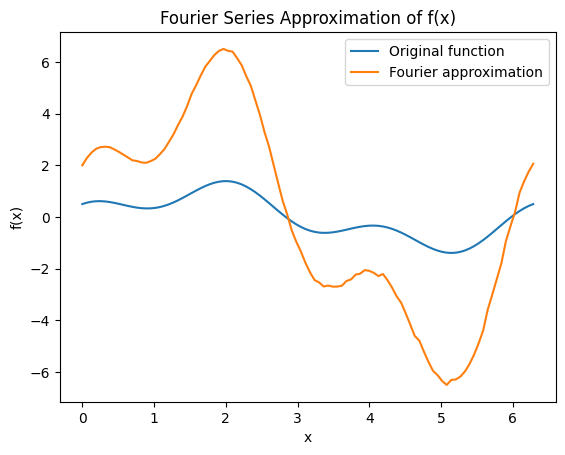

In [40]:
# Fourier series approximation
f_approx = np.zeros_like(x_values)
for k, (A_k, B_k) in enumerate(coefficients, start=1):
    f_approx += A_k * np.cos(k * x_values) + B_k * np.sin(k * x_values)

# Plotting the original function and Fourier approximation
plt.plot(x_values, f(x_values), label='Original function')
plt.plot(x_values, f_approx, label='Fourier approximation')
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Fourier Series Approximation of f(x)')
plt.show()


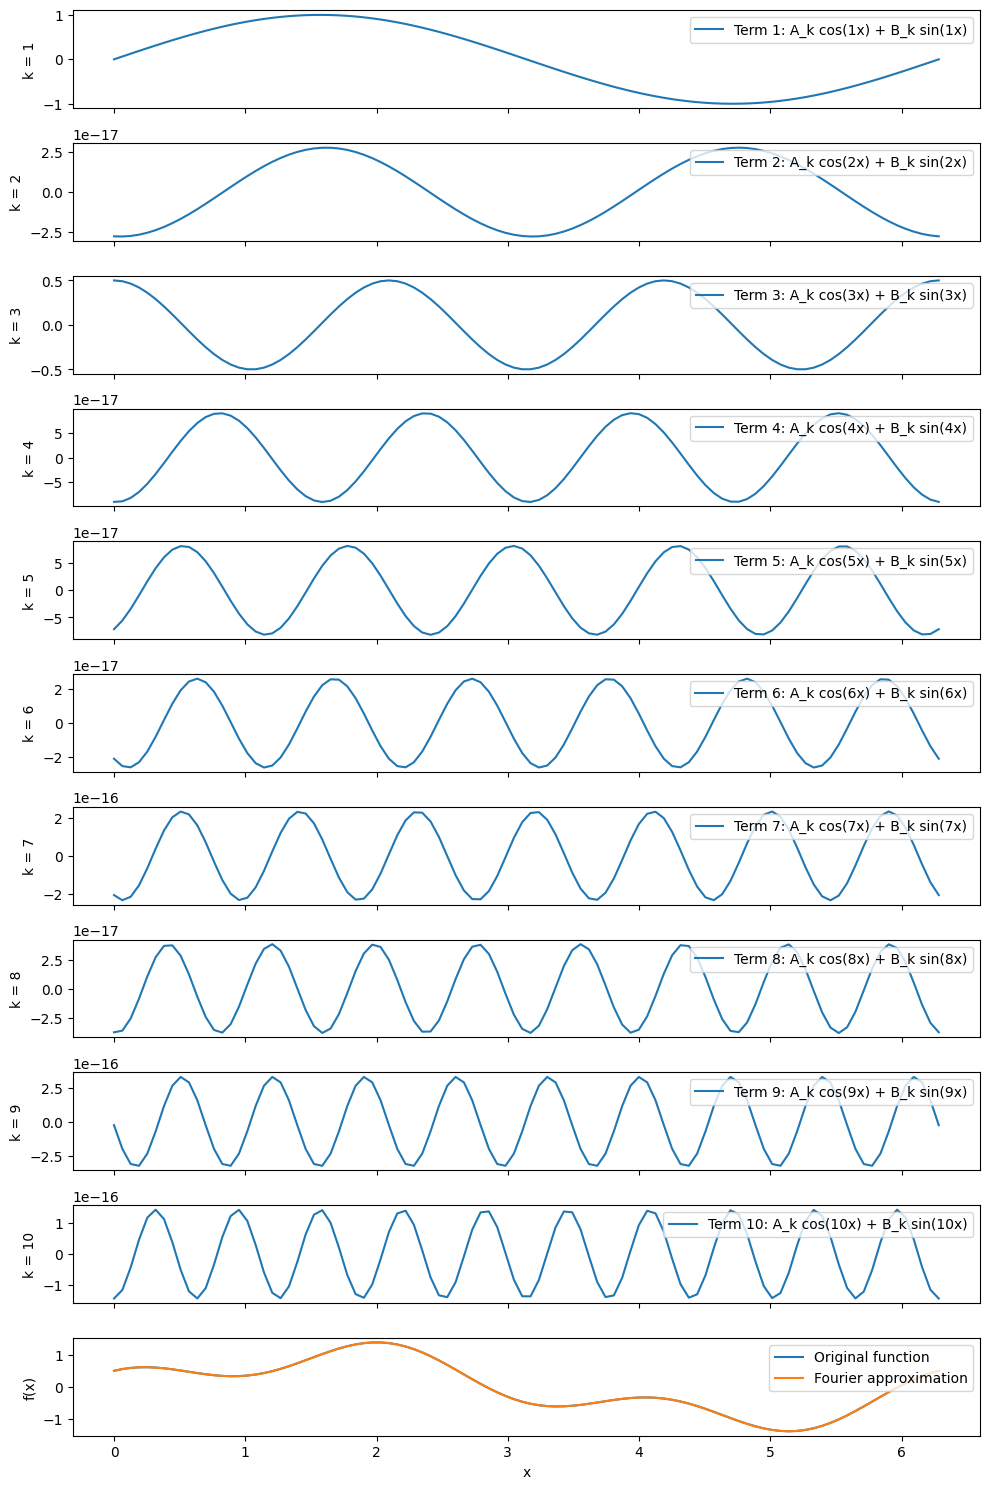

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x) we want to approximate
def f(x):
    # Example function, can be customized
    return np.sin(x) + 0.5 * np.cos(3 * x)

# Fourier series parameters
N = 10  # Number of terms in the Fourier series
x_values = np.linspace(0, 2 * np.pi, 100)

# Inner product calculation
def inner_product(f, g, x_values):
    # Here f and g are arrays, not functions
    return np.trapezoid(f * g, x=x_values)

# Calculate Fourier coefficients A_k and B_k with inner product and normalization
def calculate_coefficients(f, k, x_values):
    cos_kx = np.cos(k * x_values)
    sin_kx = np.sin(k * x_values)
    norm_cos_kx = inner_product(cos_kx, cos_kx, x_values)
    norm_sin_kx = inner_product(sin_kx, sin_kx, x_values)
    A_k = inner_product(f(x_values), cos_kx, x_values) / norm_cos_kx
    B_k = inner_product(f(x_values), sin_kx, x_values) / norm_sin_kx
    return A_k, B_k

# Calculate A_k and B_k for each term up to N
coefficients = [calculate_coefficients(f, k, x_values) for k in range(1, N + 1)]

# Plotting each Fourier term and the overall approximation
fig, axs = plt.subplots(N + 1, 1, figsize=(10, 15), sharex=True)

# Plot each individual Fourier term
for k, (A_k, B_k) in enumerate(coefficients, start=1):
    term_contribution = A_k * np.cos(k * x_values) + B_k * np.sin(k * x_values)
    axs[k - 1].plot(x_values, term_contribution, label=f'Term {k}: A_k cos({k}x) + B_k sin({k}x)')
    axs[k - 1].legend(loc="upper right")
    axs[k - 1].set_ylabel(f'k = {k}')

# Plot the full Fourier series approximation against the original function
f_approx = np.zeros_like(x_values)
for k, (A_k, B_k) in enumerate(coefficients, start=1):
    f_approx += A_k * np.cos(k * x_values) + B_k * np.sin(k * x_values)

axs[N].plot(x_values, f(x_values), label='Original function')
axs[N].plot(x_values, f_approx, label='Fourier approximation')
axs[N].legend(loc="upper right")
axs[N].set_xlabel('x')
axs[N].set_ylabel('f(x)')

plt.tight_layout()
plt.show()


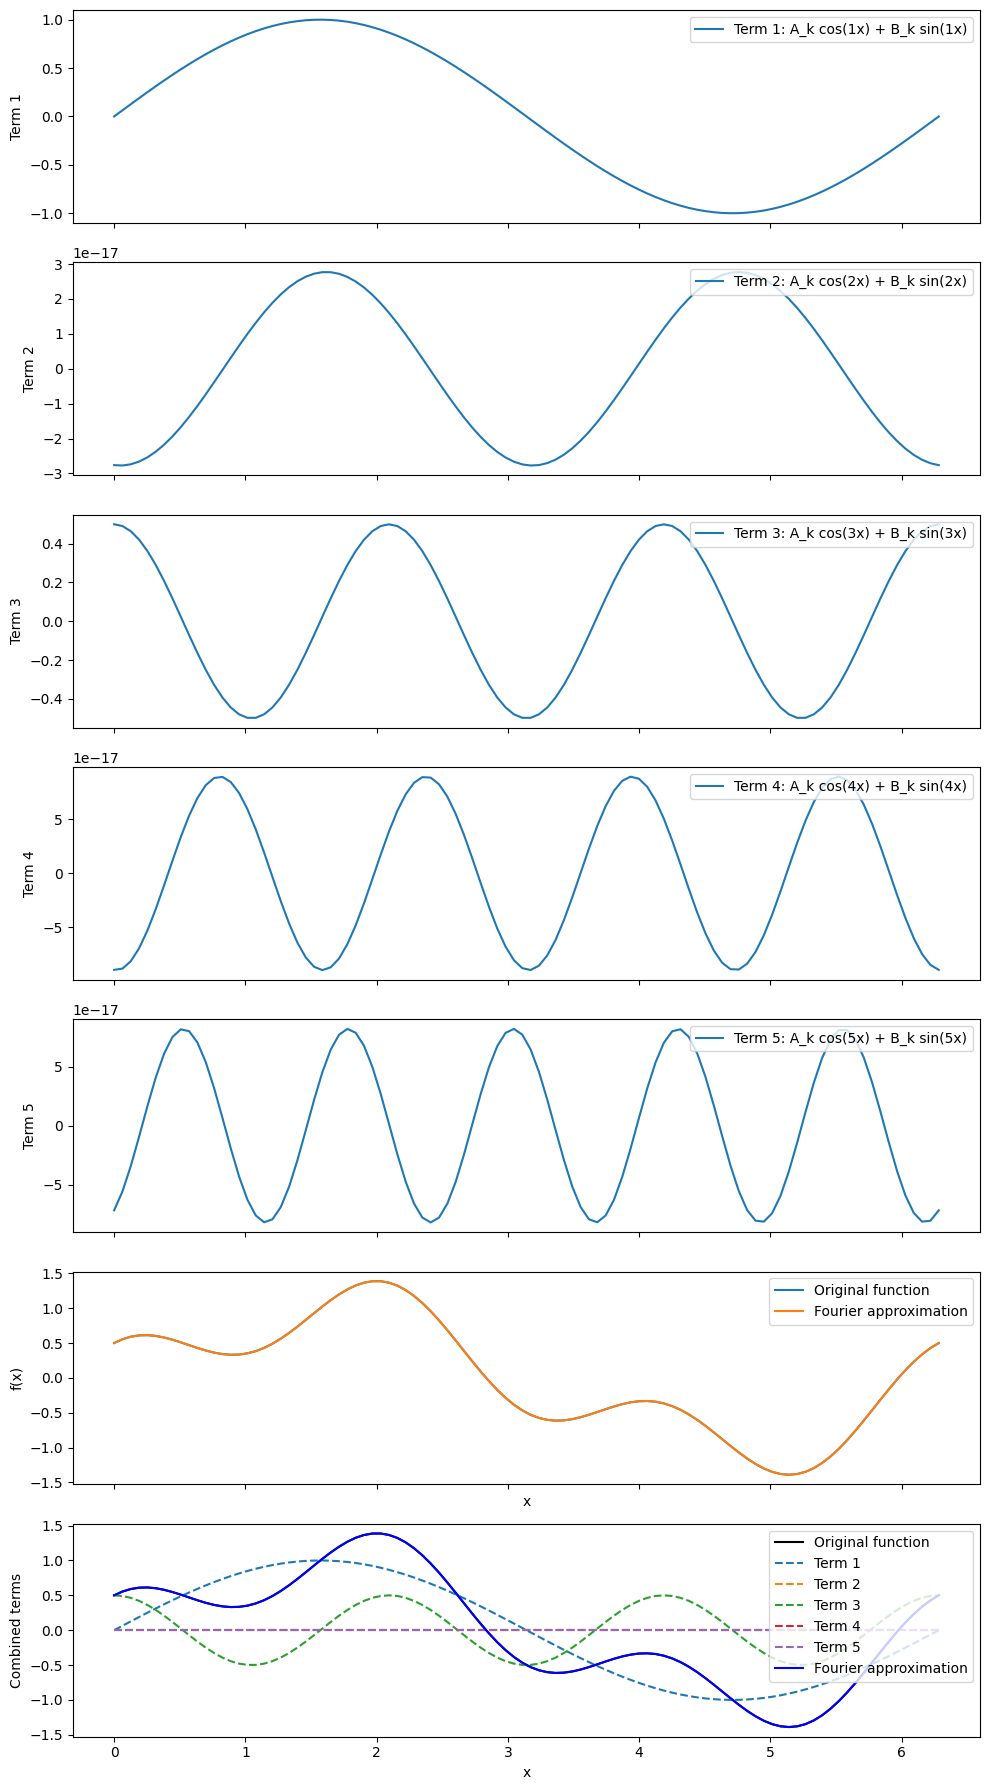

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x) we want to approximate
def f(x):
    # Example function, can be customized
    return np.sin(x) + 0.5 * np.cos(3 * x)

# Fourier series parameters
N = 5  # Number of terms in the Fourier series
x_values = np.linspace(0, 2 * np.pi, 100)

# Inner product calculation
def inner_product(f, g, x_values):
    # Here f and g are arrays, not functions
    return np.trapezoid(f * g, x=x_values)

# Calculate Fourier coefficients A_k and B_k with inner product and normalization
def calculate_coefficients(f, k, x_values):
    cos_kx = np.cos(k * x_values)
    sin_kx = np.sin(k * x_values)
    norm_cos_kx = inner_product(cos_kx, cos_kx, x_values)
    norm_sin_kx = inner_product(sin_kx, sin_kx, x_values)
    A_k = inner_product(f(x_values), cos_kx, x_values) / norm_cos_kx
    B_k = inner_product(f(x_values), sin_kx, x_values) / norm_sin_kx
    return A_k, B_k

# Calculate A_k and B_k for each term up to N
coefficients = [calculate_coefficients(f, k, x_values) for k in range(1, N + 1)]

# Plotting each Fourier term, the overall approximation, and the combined plot
fig, axs = plt.subplots(N + 2, 1, figsize=(10, 18), sharex=True)

# Plot each individual Fourier term
for k, (A_k, B_k) in enumerate(coefficients, start=1):
    term_contribution = A_k * np.cos(k * x_values) + B_k * np.sin(k * x_values)
    axs[k - 1].plot(x_values, term_contribution, label=f'Term {k}: A_k cos({k}x) + B_k sin({k}x)')
    axs[k - 1].legend(loc="upper right")
    axs[k - 1].set_ylabel(f'Term {k}')

# Plot the full Fourier series approximation against the original function
f_approx = np.zeros_like(x_values)
for k, (A_k, B_k) in enumerate(coefficients, start=1):
    f_approx += A_k * np.cos(k * x_values) + B_k * np.sin(k * x_values)

axs[N].plot(x_values, f(x_values), label='Original function')
axs[N].plot(x_values, f_approx, label='Fourier approximation')
axs[N].legend(loc="upper right")
axs[N].set_xlabel('x')
axs[N].set_ylabel('f(x)')

# Combined plot of all terms, original function, and approximation
axs[N + 1].plot(x_values, f(x_values), label='Original function', color='black', linewidth=1.5)
for k, (A_k, B_k) in enumerate(coefficients, start=1):
    term_contribution = A_k * np.cos(k * x_values) + B_k * np.sin(k * x_values)
    axs[N + 1].plot(x_values, term_contribution, linestyle='--', label=f'Term {k}')

axs[N + 1].plot(x_values, f_approx, label='Fourier approximation', color='blue', linewidth=1.5)
axs[N + 1].legend(loc="upper right")
axs[N + 1].set_xlabel('x')
axs[N + 1].set_ylabel('Combined terms')

plt.tight_layout()
plt.show()
